# GRIP | THE SPARKS FOUNDATION.

##  Data Science and Business Analytics (Batch: MAY_2021).

# TASK#2 : Prediction using Unsupervised Machine Learning.

## Predict the optimum number of clusters and represent it visually.

### Import libraries :

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import sqrt

### Reading CSV file to get the Dataset :

In [2]:
dataset = pd.read_csv("Iris_dataset.csv")

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preprocessing :

In [3]:
data = dataset.loc[: , ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"]]

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Data Visualization :

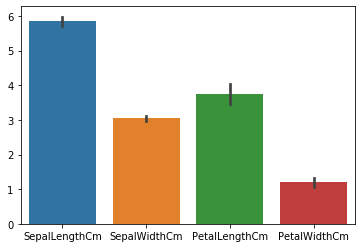

In [4]:
sns.barplot(data = data)

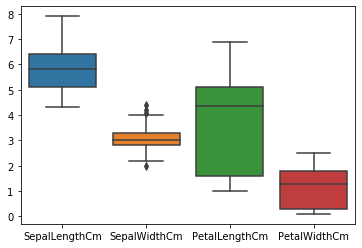

In [5]:
sns.boxplot(data = data)

## Predict Optimum Number of Clusters :

In [6]:
data = data.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++" , max_iter = 300 , n_init = 10 , random_state = 0)
    
    kmeans = kmeans.fit(data)
    
    wcss.append(kmeans.inertia_)

### Visualizing Elbow Method to Decide Optimum number of Clusters : 

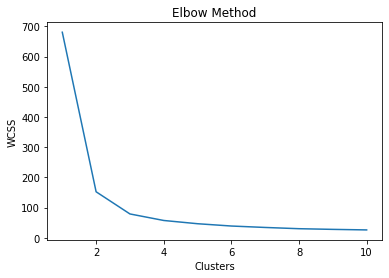

In [7]:
plt.plot(range(1,11) , wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

## Applying KMeans on Optimum Number of Clusters :

In [8]:
kmeans = KMeans(n_clusters = 3 , init = "k-means++" , n_init = 10 , max_iter = 300 , random_state = 0)

Kmeans_Y = kmeans.fit_predict(data)

### Plotting the Clusters and their Centroids :

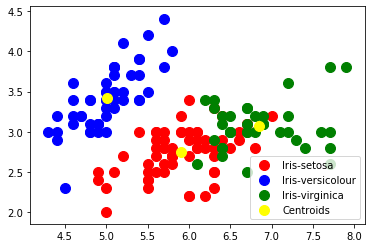

In [9]:
plt.scatter(data[Kmeans_Y == 0, 0], data[Kmeans_Y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')


plt.scatter(data[Kmeans_Y == 1, 0], data[Kmeans_Y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')


plt.scatter(data[Kmeans_Y == 2, 0], data[Kmeans_Y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()